In [ ]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=7eb6d2e619bc4ef2c252cbdeb79f83bf8b14305ee1237877d7d43b43888098f4
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_timestamp, window, countDistinct

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Web Log Analysis") \
    .getOrCreate()

# Load data
df = spark.read.csv("/content/web_server_logs - Sheet1 (1).csv", header=True, inferSchema=True)

# Data processing
# Convert timestamp to actual timestamp type
df = df.withColumn("timestamp", to_timestamp(col("timestamp")))

# Analyze traffic patterns over time
traffic_per_hour = df.groupBy(window(col("timestamp"), "1 hour")).count()
traffic_per_hour = traffic_per_hour.select(col("window.start").alias("hour"), "count").orderBy("hour")

# Find unique visitors per day
unique_visitors_per_day = df.withColumn("day", col("timestamp").cast("date")).groupBy("day").agg(countDistinct("ip").alias("unique_visitors"))

# Most visited pages
page_visits = df.groupBy("request").count().orderBy(col("count").desc())

# Show results
traffic_per_hour.show()
unique_visitors_per_day.show()
page_visits.show()

# Optionally, save results
traffic_per_hour.write.csv('traffic_per_hour.csv', header=True)
unique_visitors_per_day.write.csv('unique_visitors_per_day.csv', header=True)
page_visits.write.csv('page_visits.csv', header=True)

# Stop Spark session
spark.stop()


+-------------------+-----+
|               hour|count|
+-------------------+-----+
|2024-05-13 08:00:00|    4|
|2024-05-13 09:00:00|    4|
|2024-05-13 10:00:00|    4|
|2024-05-13 11:00:00|    4|
|2024-05-13 12:00:00|    4|
|2024-05-13 13:00:00|    4|
|2024-05-13 14:00:00|    4|
|2024-05-13 15:00:00|    4|
|2024-05-13 16:00:00|    4|
|2024-05-13 17:00:00|    4|
|2024-05-13 18:00:00|    4|
|2024-05-13 19:00:00|    4|
|2024-05-13 20:00:00|    4|
|2024-05-13 21:00:00|    4|
|2024-05-13 22:00:00|    4|
|2024-05-13 23:00:00|    4|
|2024-05-14 00:00:00|    4|
|2024-05-14 01:00:00|    4|
|2024-05-14 02:00:00|    4|
|2024-05-14 03:00:00|    4|
+-------------------+-----+
only showing top 20 rows

+----------+---------------+
|       day|unique_visitors|
+----------+---------------+
|2024-05-13|             64|
|2024-05-14|             40|
+----------+---------------+

+--------------------+-----+
|             request|count|
+--------------------+-----+
|GET /page21 HTTP/1.1|    1|
|GET /page4

In [ ]:
!pip install matplotlib pandas

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_timestamp, window, countDistinct, when

In [ ]:
# Start a new Spark session
spark = SparkSession.builder \
    .appName("Web Log Analysis") \
    .getOrCreate()

# Load data
df = spark.read.csv("/content/web_server_logs - Sheet1 (1).csv", header=True, inferSchema=True)

# Data processing
# Convert timestamp to actual timestamp type
df = df.withColumn("timestamp", to_timestamp(col("timestamp")))

# Analyze traffic patterns over time
traffic_per_hour = df.groupBy(window(col("timestamp"), "1 hour")).count()
traffic_per_hour = traffic_per_hour.select(col("window.start").alias("hour"), "count").orderBy("hour")

# Find unique visitors per day
unique_visitors_per_day = df.withColumn("day", col("timestamp").cast("date")).groupBy("day").agg(countDistinct("ip").alias("unique_visitors"))

# Most visited pages
page_visits = df.groupBy("request").count().orderBy(col("count").desc())

# Update operation example: Increase count for specific request
updated_page_visits = page_visits.withColumn("count", when(col("request") == "specific_request", col("count") + 1).otherwise(col("count")))

# Show the updated DataFrame
updated_page_visits.show()

# Stop Spark session
spark.stop()

+--------------------+-----+
|             request|count|
+--------------------+-----+
|GET /page21 HTTP/1.1|    1|
|GET /page45 HTTP/1.1|    1|
|GET /unsubscribe ...|    1|
|GET /page49 HTTP/1.1|    1|
|GET /page17 HTTP/1.1|    1|
|  GET /home HTTP/1.1|    1|
|GET /profile HTTP...|    1|
|POST /create_post...|    1|
|GET /logout HTTP/1.1|    1|
|GET /page40 HTTP/1.1|    1|
|GET /page58 HTTP/1.1|    1|
|GET /page19 HTTP/1.1|    1|
|GET /page56 HTTP/1.1|    1|
|POST /like_post H...|    1|
|POST /change_lang...|    1|
|GET /page65 HTTP/1.1|    1|
|GET /page64 HTTP/1.1|    1|
|POST /add_to_cart...|    1|
|GET /page57 HTTP/1.1|    1|
|GET /page50 HTTP/1.1|    1|
+--------------------+-----+
only showing top 20 rows



In [ ]:
# Start a new Spark session
spark = SparkSession.builder \
    .appName("Web Log Analysis") \
    .getOrCreate()

# Load data
df = spark.read.csv("/content/web_server_logs - Sheet1 (1).csv", header=True, inferSchema=True)

# Data processing
# Convert timestamp to actual timestamp type
df = df.withColumn("timestamp", to_timestamp(col("timestamp")))

# Most visited pages
page_visits = df.groupBy("request").count().orderBy(col("count").desc())

# Delete operation example: Filter out specific request
filtered_page_visits = page_visits.filter(col("request") != "specific_request")

# Show the filtered DataFrame
filtered_page_visits.show()

# Stop Spark session
spark.stop()


+--------------------+-----+
|             request|count|
+--------------------+-----+
|GET /page21 HTTP/1.1|    1|
|GET /page45 HTTP/1.1|    1|
|GET /unsubscribe ...|    1|
|GET /page49 HTTP/1.1|    1|
|GET /page17 HTTP/1.1|    1|
|  GET /home HTTP/1.1|    1|
|GET /profile HTTP...|    1|
|POST /create_post...|    1|
|GET /logout HTTP/1.1|    1|
|GET /page40 HTTP/1.1|    1|
|GET /page58 HTTP/1.1|    1|
|GET /page19 HTTP/1.1|    1|
|GET /page56 HTTP/1.1|    1|
|POST /like_post H...|    1|
|POST /change_lang...|    1|
|GET /page65 HTTP/1.1|    1|
|GET /page64 HTTP/1.1|    1|
|POST /add_to_cart...|    1|
|GET /page57 HTTP/1.1|    1|
|GET /page50 HTTP/1.1|    1|
+--------------------+-----+
only showing top 20 rows



AttributeError: 'NoneType' object has no attribute 'setCallSite'

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the page_visits DataFrame

# Convert DataFrame to Pandas DataFrame for plotting
page_visits_pd = page_visits.toPandas()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(page_visits_pd['request'], page_visits_pd['count'], color='skyblue')
plt.xlabel('Page Request')
plt.ylabel('Count')
plt.title('Page Visits Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


AttributeError: 'NoneType' object has no attribute 'setCallSite'

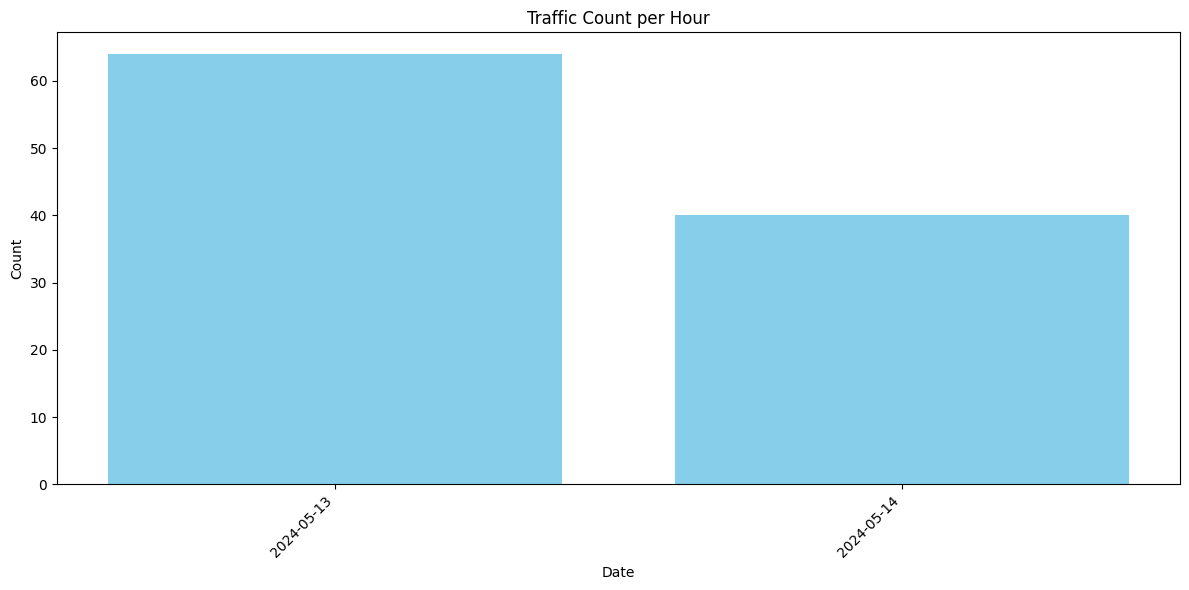

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the traffic_per_hour DataFrame

# Convert DataFrame to Pandas DataFrame for plotting
traffic_per_hour_pd = traffic_per_hour.toPandas()

# Extracting date from the start of the window
traffic_per_hour_pd['hour'] = traffic_per_hour_pd['hour'].astype(str).str.slice(0, 10)

# Grouping by date and counting occurrences
traffic_count_per_hour = traffic_per_hour_pd.groupby('hour').sum()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(traffic_count_per_hour.index, traffic_count_per_hour['count'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Traffic Count per Hour')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


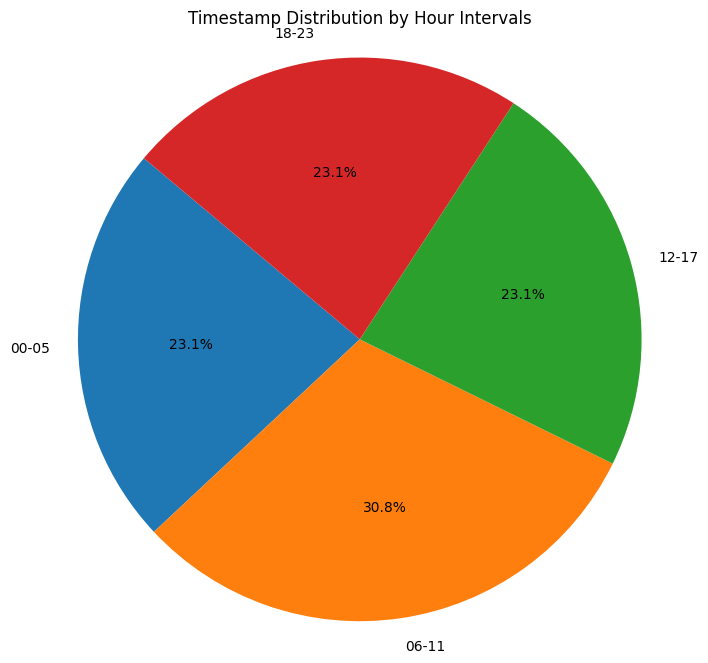

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already calculated the traffic_per_hour DataFrame

# Convert DataFrame to Pandas DataFrame for easier manipulation
traffic_per_hour_pd = traffic_per_hour.toPandas()

# Extract hour from the start of the window and categorize into time intervals
traffic_per_hour_pd['hour'] = traffic_per_hour_pd['hour'].astype(str).str.slice(11, 13)
traffic_per_hour_pd['hour_interval'] = pd.cut(traffic_per_hour_pd['hour'].astype(int), bins=4, labels=['00-05', '06-11', '12-17', '18-23'])

# Group by hour intervals and count occurrences
hour_interval_counts = traffic_per_hour_pd.groupby('hour_interval').count()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(hour_interval_counts['count'], labels=hour_interval_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Timestamp Distribution by Hour Intervals')
plt.show()
